# Case Study on Measures of Central Tendency and Dispersion

### An Institution wishes to find out their student’s ability in maths, reading and writing skills. The Institution wants to do an exploratory study to check the following information.

1. Find out how many males and females participated in the test.
2. What do you think about the students' parental level of education?
3. Who scores the most on average for math, reading and writing based on
- Gender
- Test preparation course
4. What do you think about the scoring variation for math, reading and writing based on
- Gender
- Test preparation course
5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you    help the management to achieve this.

In [1]:
#importing dependencies 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading the 'Studentperfomance.csv' file using read_csv()
df = pd.read_csv("StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [4]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93
999,male,group E,bachelor's degree,standard,completed,100,100,100


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


## 1. Find out how many males and females participated in the test.


In [8]:
df_gender = df.groupby('gender')['race/ethnicity'].count()
df_gender

gender
female    518
male      482
Name: race/ethnicity, dtype: int64

Text(0, 0.5, 'Count')

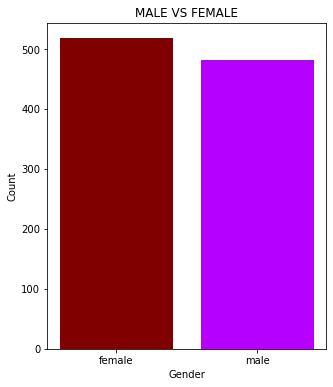

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,6))
gender = df['gender'].value_counts().to_frame().reset_index()
plt.bar(gender['index'],gender['gender'],color = ['maroon','#B500FF'])
plt.title("MALE VS FEMALE")
plt.xlabel('Gender')
plt.ylabel('Count')

## 2. What do you think about the students' parental level of education?

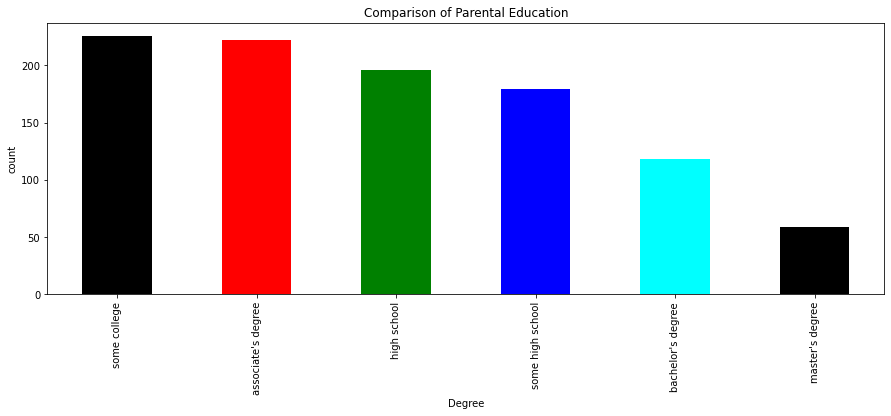

In [10]:
plt.subplots(figsize=(15,5))
df['parental level of education'].value_counts(normalize = True)
df['parental level of education'].value_counts(dropna = False).plot.bar(color=['black', 'red', 'green', 'blue', 'cyan'])
plt.title('Comparison of Parental Education')
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

In [11]:
df['parental level of education'].count()

1000

In [12]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

**Findings**

* Out of 1000 parents 226 parents completed some colleges.
* 222 parents hold an associate degree.
* 196 parents only have an high school level education.
* 118 parents hold an bachelors degree.
* Only 59 parents hold an masters degree.

## 3. Who scores the most on average for math, reading and writing based on
### - Gender
### - Test preparation course

### A) On basis of Gender

### Gender Wise - Math Score Average

In [13]:
#math score average on the basis of gender
gender1 = df.groupby('gender')['math score'].mean().sort_values(ascending=False)
print("Average of math score on the basis of gender:")
print(gender1)

Average of math score on the basis of gender:
gender
male      68.821577
female    63.376448
Name: math score, dtype: float64


**Findings**

On the basis of gender male scored the most on maths with average score 68.82.

### Gender Wise -  Reading Score Average

In [14]:
#reading score average on the basis of gender
gender2 = df.groupby('gender')['reading score'].mean().sort_values(ascending=False)
print("Average of reading score on the basis of gender:")
print(gender2)

Average of reading score on the basis of gender:
gender
female    72.590734
male      65.545643
Name: reading score, dtype: float64


**Findings**

On the basis of gender female scored the most on reading with avreage score of 72.59.

### Gender Wise - Writing Score Average

In [15]:
#writing score average on the basis of gender
gender3 = df.groupby('gender')['writing score'].mean().sort_values(ascending=False)
print("Average of writing score on the basis of gender:")
print(gender3)

Average of writing score on the basis of gender:
gender
female    72.467181
male      63.446058
Name: writing score, dtype: float64


**Findings**

On the basis of gender female scored the most on writing with average score of 72.46.

### Gender Wise - Total Score Average

In [16]:
#calculating total score and average score.
df['total'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total'] / 3

In [17]:
#average of all three score on the basis of gender
avg = df.groupby('gender')['average'].mean().sort_values(ascending=False)
print("Average of writing, reading and math score on the basis of gender :")
print(avg)

Average of writing, reading and math score on the basis of gender :
gender
female    69.478121
male      65.937759
Name: average, dtype: float64


**Findings**

On the basis of gender female scored the most on the average of all subjects.

### B) Based on test preparation course

### Test Preparation Wise - Math Score Average

In [18]:
#math score average on the basis of test preparation
test = df.groupby('test preparation course')['math score'].mean().sort_values(ascending=False)
print("Average of math score on the basis of Test preparation course :")
print(test)

Average of math score on the basis of Test preparation course :
test preparation course
completed    69.96648
none         63.78972
Name: math score, dtype: float64


**Findings**

On the basis of test preparation, those who completed the test preparation scored high mark in maths, with average score 69.96.

### Test Preparation Wise - Reading Score Average

In [19]:
#reading score average on the basis of test preparation
test1 = df.groupby('test preparation course')['reading score'].mean().sort_values(ascending=False)
print("Average of reading score on the basis of Test preparation course :")
print(test1)

Average of reading score on the basis of Test preparation course :
test preparation course
completed    74.175978
none         66.417445
Name: reading score, dtype: float64


**Findings**

On the basis of test preparation, those who completed the test preparation scored high mark in reading, with average score 74.17.

### Test Preparation Wise - Writing Score Average

In [20]:
#writing score average on the basis of test preparation
test3 = df.groupby('test preparation course')['writing score'].mean().sort_values(ascending=False)
print("Average of writing score on the basis of Test preparation course :")
print(test3)

Average of writing score on the basis of Test preparation course :
test preparation course
completed    74.684358
none         64.457944
Name: writing score, dtype: float64


**Findings**

On the basis of test preparation, those who completed the test preparation scored high mark in writing, with average score 74.68.

### Test Preparation Wise - Total Score Average

In [21]:
#average of all three score on the basis of test preparation
test3 = df.groupby('test preparation course')['average'].mean().sort_values(ascending=False)
print("Average of writing, reading and math score on the basis of Test preparation course :")
print(test3)

Average of writing, reading and math score on the basis of Test preparation course :
test preparation course
completed    72.942272
none         64.888370
Name: average, dtype: float64


**Findings**

On the basis of test preparation, those who completed the test preparation scored high mark in all subject, with average score 72.94. Those who not complete their preparation scored less in all subject.


## 4. What do you think about the scoring variation for math, reading and writing based on
### - Gender
### - Test preparation course

### Coefficient Of Variation
* **The coefficient of variation(cv) is the ratio of the standard deviation to the mean.**
* **A lower CV implies low degree of variation while a higher CV connotes a higher variation or greater degree of relative variability.**
* **Analysts often report the coefficient of variation as a percentage.**


In [22]:
data = pd.read_csv("StudentsPerformance.csv")

### Gender Wise - Maths Score Variation

In [23]:
data1=pd.DataFrame(data)
data2=data1.groupby("gender")["math score"].describe()
dfn=pd.DataFrame(data2)

#coefficient of variation
dfn["cv"]=(data2["std"]/data2["mean"])*100
dfn.sort_values(by="cv",ascending=True)

,count,mean,std,min,25%,50%,75%,max,cv
gender,,,,,,,,,
male,482.0,68.821577,14.556411,27.0,59.0,69.0,79.0,100.0,21.150941
female,518.0,63.376448,16.029928,0.0,54.0,65.0,74.0,100.0,25.293194


**Findings**

In maths score females holds an higher variation (25.29%) in camparison to male maths score variation.

### Gender Wise - Reading Score Variation

In [24]:
data1=pd.DataFrame(data)
data2=data1.groupby("gender")["reading score"].describe()
dfn=pd.DataFrame(data2)

#coefficient of variation
dfn["cv"]=(data2["std"]/data2["mean"])*100
dfn.sort_values(by="cv",ascending=True)

,count,mean,std,min,25%,50%,75%,max,cv
gender,,,,,,,,,
female,518.0,72.590734,14.411018,17.0,63.25,73.0,83.0,100.0,19.852421
male,482.0,65.545643,14.149594,23.0,56.00,66.0,76.0,100.0,21.587391


**Findings**

In reading score male has an higher variation (21.58%) in camparison to female reading score variation.

### Gender Wise - Writing Score Variation

In [25]:
data1=pd.DataFrame(data)
data2=data1.groupby("gender")["writing score"].describe()
dfn=pd.DataFrame(data2)

#coefficient of variation
dfn["cv"]=(data2["std"]/data2["mean"])*100
dfn.sort_values(by="cv",ascending=True)

,count,mean,std,min,25%,50%,75%,max,cv
gender,,,,,,,,,
female,518.0,72.467181,14.844842,10.0,64.0,74.0,82.0,100.0,20.484917
male,482.0,63.446058,14.227225,15.0,53.0,64.0,74.0,100.0,22.424127


**Findings**

In writing score male has an higher variation (22.42%) in camparison to female writing score variation.

### Test Preparation Wise - Maths Score Variation

In [26]:
data1=pd.DataFrame(data)
data2=data1.groupby("test preparation course")["math score"].describe()
dfn=pd.DataFrame(data2)

#coefficient of variation
dfn["cv"]=(data2["std"]/data2["mean"])*100
dfn.sort_values(by="cv",ascending=True)

,count,mean,std,min,25%,50%,75%,max,cv
test preparation course,,,,,,,,,
completed,358.0,69.96648,14.521847,23.0,61.0,70.0,79.0,100.0,20.755434
none,642.0,63.78972,15.705689,0.0,54.0,64.0,74.0,100.0,24.621034


**Findings**

Those who not completed the test preparation has an higher variation in maths score in camparison to those who completed.

### Test Preparation Wise - Reading Score Variation

In [27]:
data1=pd.DataFrame(data)
data2=data1.groupby("test preparation course")["reading score"].describe()
dfn=pd.DataFrame(data2)

#coefficient of variation
dfn["cv"]=(data2["std"]/data2["mean"])*100
dfn.sort_values(by="cv",ascending=True)

,count,mean,std,min,25%,50%,75%,max,cv
test preparation course,,,,,,,,,
completed,358.0,74.175978,13.537572,37.0,66.0,75.0,84.0,100.0,18.250615
none,642.0,66.417445,14.608896,17.0,57.0,67.0,76.0,100.0,21.995571


**Findings**

Those who not completed the test preparation has an higher variation in reading score in camparison to those who completed.

### Test Preparation Wise - Writing Score Variation

In [28]:
data1=pd.DataFrame(data)
data2=data1.groupby("test preparation course")["writing score"].describe()
dfn=pd.DataFrame(data2)

#coefficient of variation
dfn["cv"]=(data2["std"]/data2["mean"])*100
dfn.sort_values(by="cv",ascending=True)

,count,mean,std,min,25%,50%,75%,max,cv
test preparation course,,,,,,,,,
completed,358.0,74.684358,13.236412,36.0,67.0,76.0,83.75,100.0,17.723139
none,642.0,64.457944,15.041667,10.0,54.0,65.0,74.00,100.0,23.335629


**Findings**

Those who not completed the test preparation has an higher variation(23.33%) in writing score in camparison to those who completed.

## 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you    help the management to achieve this.

In [29]:
data.sort_values('math score',ascending=False).head(int(df.shape[0]*.25))

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
856,male,group E,some high school,standard,completed,77,76,77
855,male,group E,associate's degree,free/reduced,completed,77,69,68
854,male,group D,some high school,standard,completed,77,68,69
853,male,group D,associate's degree,free/reduced,none,77,78,73


In [30]:
data.sort_values('math score',ascending=False).tail(int(df.shape[0]*.25))

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
616,male,group C,associate's degree,standard,completed,57,54,56
615,male,group B,high school,standard,none,57,48,51
614,male,group B,associate's degree,free/reduced,none,57,56,57
152,female,group E,master's degree,free/reduced,none,56,72,65
611,male,group D,some high school,free/reduced,none,56,54,52
...,...,...,...,...,...,...,...,...
2,female,group B,some high school,free/reduced,none,18,32,28
51,female,group C,some high school,free/reduced,none,13,41,51
3,female,group B,some college,standard,none,11,38,32
1,female,group B,high school,free/reduced,none,8,24,23


# END

In [31]:
#Submitted by Akshaya.v